# Table of contents
1. [Background](#background)

2. [Import Libraries](#libraries)

3. [Load Data](#data)

4. [Clean Data](#clean)

    4.1. [Null Values](#null)
    
    4.2. [Repeating Values](#repeat)
    
    4.3. [Merging Data](#merge)
    
    4.4. [Splitting Columns](#split)
    
    4.5. [Categorical to Numerical](#change)
    
5. [General Analysis](#general)

    5.1. [Statistics](#stats)
    
    5.2. [Visualisation](#vis)
    
      5.2.1. [Correlation](#corr)
        
6. [Targetted Analysis](#targetted)

    6.1. [Sleep Patterns and Quality](#patterns)
    
      6.1.1. [What is the average sleep duration among different age groups and genders?](#agegender)
      
      6.1.2. [Is there a correlation between stress levels and sleep quality ratings?](#stressquality)
      
      6.1.3. [Do certain occupations have significantly different sleep patterns or quality ratings?](#jobsleep)
      
      6.1.4. [What are the most common reasons for poor sleep quality among participants?](#reasons)
      
    6.2. [Sleep Disorder Identification](#id)
    
      6.2.1. [Can we identify common factors or lifestyle patterns associated with Insomnia or Sleep Apnea?](#disorders)
      
      6.2.2. [Are there age or gender-related trends in the occurrence of sleep disorders?](#demodisorder)
      
      6.2.3. [What percentage of individuals with Insomnia or Sleep Apnea fall into specific BMI categories?](#bmidisorder)
    
    6.3 [Cardiovascular Health Analysis](#cv)
    
      6.3.1. [Is there a relationship between high stress levels and elevated blood pressure readings?](#stressbp)
      
      6.3.2. [Do individuals with Sleep Apnea tend to have higher resting heart rates?](#sarate)
      
    6.4. [Lifestyle and Physical Activity](#lifestyle)
    
      6.4.1. [Is there a correlation between daily physical activity levels and sleep quality?](#paquality)
      
      6.4.2. [Do individuals with higher physical activity levels tend to sleep longer?](#palength)
      
      6.4.3. [What is the impact of physical activity on stress reduction?](#pastress)
      
   6.5. [BMI and Health Implications](#bmi) 
   
      6.5.1. [Can we identify lifestyle factors contributing to BMI changes?](#lifestylebmi)






# 1. Background <a name="background"></a>

A healthcare insurance company seeks to leverage the insights from the Sleep Health and Lifestyle Dataset to enhance patient care and well-being. Specifically, they aim to:

Improve patient outcomes and overall health by identifying individuals at risk of sleep disorders, personalizing sleep recommendations, assessing and reducing cardiovascular risks through better sleep, tailoring health education programs, and implementing remote monitoring solutions for proactive intervention and support.

# 2. Import Libraries <a name="libraries"></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Load Data <a name="data"></a>

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

Let's peek at the data:

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# 4. Clean Data <a name="clean"></a>

## 4.1. Null values <a name="null"></a>

In [4]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

As we can see there nulls under the 'Sleep Disorder' column that need to be dealt with.
Since there rest of the columns are full of important information we do not want to lose, we will fill the null values with 0s.

In [5]:
df = df.fillna("None")

## 4.2. Repeating Values <a name="repeat"></a>

Some of the data appears to be duplicated. Let's check and remove any duplicates.

In [6]:
# Checking for duplicates
df.drop("Person ID", axis = 1).duplicated()

0      False
1      False
2       True
3      False
4       True
       ...  
369     True
370     True
371     True
372     True
373     True
Length: 374, dtype: bool

As we can see there is lots of duplicated data that can cause problems by skewing the data set, so we need to remove them.

In [7]:
# Removing duplicates and person ID since it does not add any valuable info
df2 = df.drop("Person ID", axis = 1).drop_duplicates().reset_index(drop = True)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   132 non-null    object 
 1   Age                      132 non-null    int64  
 2   Occupation               132 non-null    object 
 3   Sleep Duration           132 non-null    float64
 4   Quality of Sleep         132 non-null    int64  
 5   Physical Activity Level  132 non-null    int64  
 6   Stress Level             132 non-null    int64  
 7   BMI Category             132 non-null    object 
 8   Blood Pressure           132 non-null    object 
 9   Heart Rate               132 non-null    int64  
 10  Daily Steps              132 non-null    int64  
 11  Sleep Disorder           132 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 12.5+ KB


## 4.3. Merging Data <a name="merge"></a>

In [9]:
df2['BMI Category'].value_counts()

BMI Category
Normal           57
Overweight       52
Normal Weight    16
Obese             7
Name: count, dtype: int64

The BMI column also has two categories for normal weight: "normal" and "normal weight". These need to be merged to avoid problems later on.

In [10]:
mapping = {'Normal':'Normal Weight',
          'Overweight':'Overweight',
          'Normal Weight':'Normal Weight',
          'Obese':'Obese'}

df2['BMI Category'] = df2['BMI Category'].map(mapping)

In [11]:
# Checking the changes were applied
df2['BMI Category'].value_counts()

BMI Category
Normal Weight    73
Overweight       52
Obese             7
Name: count, dtype: int64

## 4.4. Splitting Columns <a name="split"></a>

Next we need to make the code more useable. We need to split the Blood Pressure column into two separate columns, since it is actually two separate readings. 

In [12]:
# split the BP column into two columns
df2[['Systolic BP', 'Diastolic BP']] = df2['Blood Pressure'].str.split('/', expand=True)

In [13]:
df2.head(6)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None,125,80
2,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
3,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90
4,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,140,90
5,Male,29,Doctor,7.8,7,75,6,Normal Weight,120/80,70,8000,None,120,80


In [14]:
# Check the types 
df2.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic BP                 object
Diastolic BP                object
dtype: object

In [15]:
# Convert the new columns to int
df2["Systolic BP"] = df2["Systolic BP"].astype(int)
df2["Diastolic BP"] = df2["Diastolic BP"].astype(int)

In [16]:
# Check the types after conversion
df2.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic BP                  int32
Diastolic BP                 int32
dtype: object

In [17]:
# Remove now redundant data
df3 = df2.drop(['Blood Pressure'], axis=1)

In [18]:
# Check the removal
df3

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,None,125,80
2,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
3,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90
4,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,None,140,95
128,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,None,140,95
129,Female,59,Nurse,8.2,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
130,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


## 4.5. Categorical to Numerical <a name="change"></a>

Create a copy of Sleep Disorder as a numerical feature - for correlation analysis

In [19]:
mapping = {'None':0,
          'Sleep Apnea':1,
          'Insomnia':2}
df3['Sleep_Disorder_Numeric'] = df3['Sleep Disorder'].map(mapping)

# 5. General Analysis <a name="general"></a>

## 5.1. Statistics <a name="stats"></a>

Let's get a quick summary of the dataset and see what it can tell us.

In [20]:
df3.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Sleep_Disorder_Numeric
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,41.128788,7.082576,7.151515,58.393939,5.537879,71.204545,6637.878788,128.363636,84.537879,0.666667
std,8.813942,0.775335,1.269037,20.468840,1.740428,4.867306,1766.288657,7.825650,6.049926,0.816497
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000,0.000000
25%,33.750000,6.400000,6.000000,44.250000,4.000000,68.000000,5000.000000,120.750000,80.000000,0.000000
50%,41.000000,7.150000,7.000000,60.000000,6.000000,70.000000,7000.000000,130.000000,85.000000,0.000000
75%,49.000000,7.725000,8.000000,75.000000,7.000000,74.000000,8000.000000,135.000000,88.500000,1.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000,2.000000


What we can tell from these statistics is that:
- The average age in the dataset is 41.1 years old, with the youngest being 27 and the oldest being 59. So the dataset does not deal with children or the elderly.
- The average sleep duration is 7.1 hours, with a minimum of 5.8 hours and a maximum of 8.5 hours. This dataset does not deal with any severely sleep deprived individuals or people who are regularly oversleeping.
- The quality of sleep ranges from 4 to 9, which is quite a variation. 50% of people had a quality of 7 or greater, so the people in this dataset sleep quite well. Since we do not see any 1 to 3s in the dataset, we do not have data on anyone who has a very bad quality of sleep.
- The physical activity level has a wide range, from 30 to 90. But it means the dataset does not include any bedbound individuals. 
- The stress levels also have a wide range, from 3 to 8. The average is at 5.4 and standard deviation is 1.8, meaning most people in the dataset are moderately stressed. 
- The heartrate has a minimum of 65 and a maximum of 86. These are well within normal limits.
- The step count has a wide range from 3000 to 10000 steps per day. This is a bit of an outdated measurement of physical activity as current [CDC guidelines](https://health.gov/our-work/nutrition-physical-activity/physical-activity-guidelines/current-guidelines/top-10-things-know) measure time spent exercising . Old recommendations were to get 10000 steps per day, by that measurement, only the very maximum people are getting the recommended steps.
- The average systolic blood pressure is 128, which according to the [2003 American guidelines](https://www.cdc.gov/bloodpressure/about.htm#:~:text=This%20limit%20is%20based%20on,80%20mm%20Hg%20or%20higher.) is considered prehypertensive. The maximum reading is 142, meaning a few individuals have hypertension. 
- At least 75% of the people the dataset have a diastolic blood pressure of 80 or above, which classifies them as being prehypertensive. The maximum blood pressure in the dataset is 95, meaning several individuals have hypertension.

## 5.2. Data Visualisation <a name="vis"></a>

### 5.2.1. Correlation <a name="corr"></a>

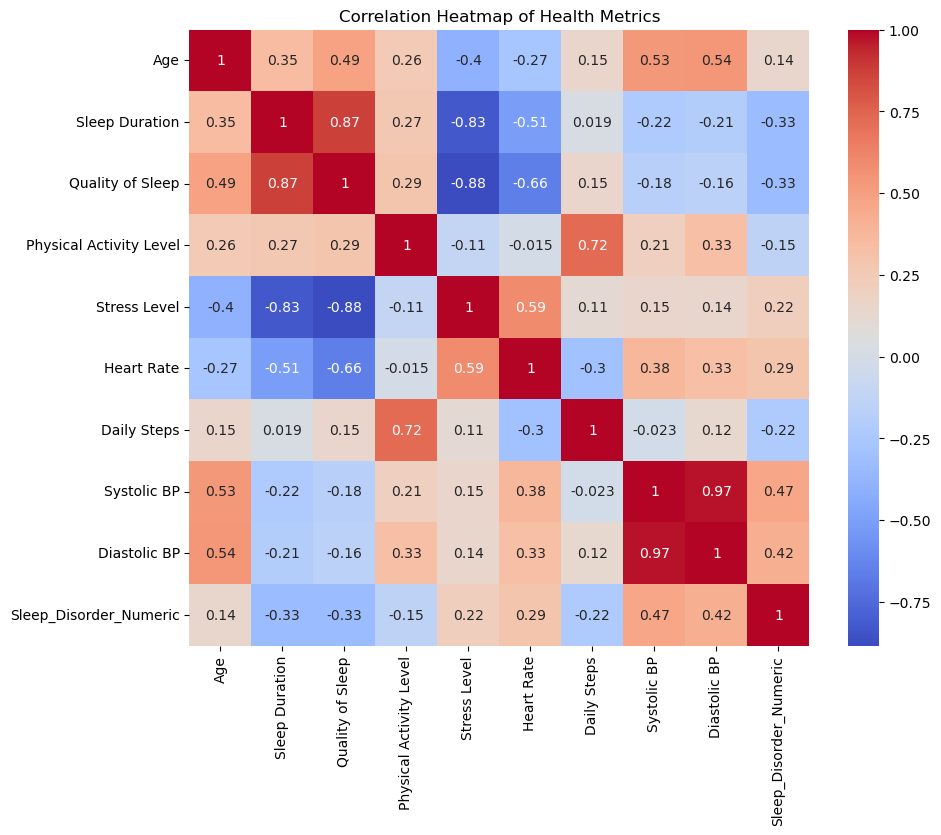

In [21]:
# Calculate correlation matrix
correlation_matrix = df3.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Health Metrics")
plt.show()

This shows that there is a very strong relationship between:
- Sleep duration and quality of sleep
- Daily steps and physical activity level
- Systolic and Diastolic BP
- Stress level and sleep duration
- Stress level and quality of sleep

These may raise multicollinearity issues later.

There is a strong relationship between:
- Systolic BP and Age
- Diastolic BP and Age
- Heart rate and sleep duration
- Heart rate and quality of sleep
- Heart rate and stress level

The rest show no to moderate correlation.

# 6.Targetted Analysis <a name="targetted"></a>

## 6.1. Sleep Patterns and Quality: <a name="patterns"></a>


- What is the average sleep duration among different age groups and genders?
- Is there a correlation between stress levels and sleep quality ratings?
- Do certain occupations have significantly different sleep patterns or quality ratings?
- What are the most common reasons for poor sleep quality among participants?

### 6.1.1. What is the average sleep duration among different age groups and genders? <a name="agegender"></a>

In [22]:
df3[['Sleep Duration','Gender']].groupby(['Gender']).mean()

,Sleep Duration
Gender,
Female,7.152308
Male,7.014925


Females appear to get slightly more sleep than males, at about 0.14 hours or 8 minutes on average.

In [23]:
# Let's create a new df with age categories in groups of ten
def replace_value(row):
    if row['Age'] >= 20 and row['Age'] <30:
        return '20-29'
    elif row['Age'] >= 30 and row['Age'] <40:
        return '30-39'
    elif row['Age'] >= 40 and row['Age'] <50:
        return '40-49'
    elif row['Age'] >= 50 and  row['Age'] <60:
        return '50-59'
    else:
        return row['Age']

df4 = df3
df4['Age Group'] = df3.apply(replace_value, axis=1)

print(df4)

     Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0      Male   27     Software Engineer             6.1                 6   
1      Male   28                Doctor             6.2                 6   
2      Male   28  Sales Representative             5.9                 4   
3      Male   28     Software Engineer             5.9                 4   
4      Male   29               Teacher             6.3                 6   
..      ...  ...                   ...             ...               ...   
127  Female   59                 Nurse             8.0                 9   
128  Female   59                 Nurse             8.1                 9   
129  Female   59                 Nurse             8.2                 9   
130  Female   59                 Nurse             8.0                 9   
131  Female   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level   BMI Category  Heart Rate  \
0             

In [24]:
bar_data = df4[['Sleep Duration','Age Group']].groupby(['Age Group']).mean()
bar_data

,Sleep Duration
Age Group,
20-29,6.300000
30-39,7.080769
40-49,6.905000
50-59,7.627586


<BarContainer object of 4 artists>

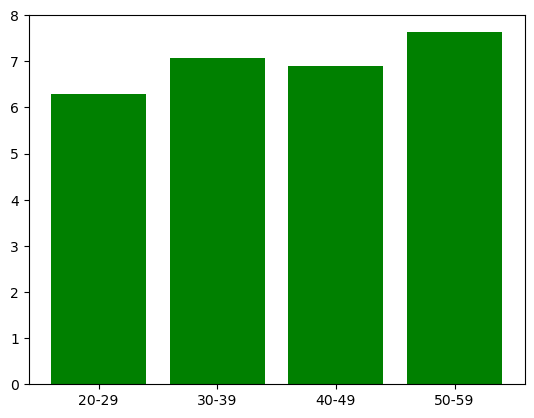

In [25]:
X = bar_data.index
Y = bar_data["Sleep Duration"]
plt.bar(X,Y,color='green')

We can see that:
- The general trend is that as age increases, so does the time spent sleeping
- 20-29 year-olds spent the least time sleeping, on average
- 50-59 year-olds spent the most time sleeping, on average

### 6.1.2. Is there a correlation between stress levels and sleep quality ratings? <a name="stressquality"></a>

Earlier we saw a very strong correlation between stress levels and sleep quality. Further investigation should be done into which causes which or if they are merely coincidental.

Text(0.5, 1.0, 'Correlation between Stress Level and Quality of Sleep')

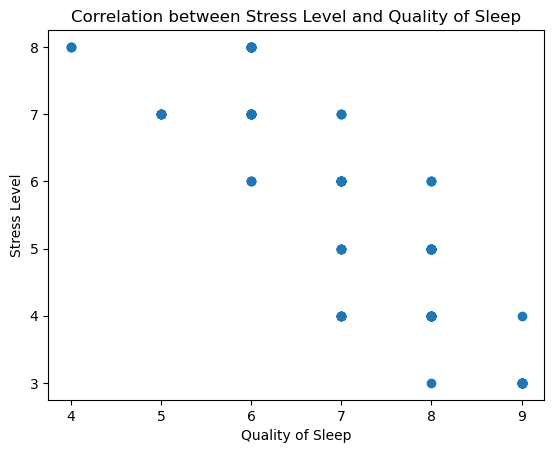

In [26]:
plt.scatter('Quality of Sleep', 'Stress Level', data = df3 )
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.title("Correlation between Stress Level and Quality of Sleep")

The data seems to indicate that an increase in stress results in a decrease in quality of sleep, and/or that a an increase in quality of sleep results in a decrease in stress.

### 6.1.3. Do certain occupations have significantly different sleep patterns or quality ratings? <a name="jobsleep"></a>

In [27]:
df3[['Occupation', "Sleep Duration", "Quality of Sleep"]].groupby("Occupation").mean()

,Sleep Duration,Quality of Sleep
Occupation,,
Accountant,7.136364,7.909091
Doctor,7.050000,6.750000
Engineer,7.800000,8.136364
Lawyer,7.380000,7.733333
Manager,6.900000,7.000000
Nurse,6.965517,7.068966
Sales Representative,5.900000,4.000000
Salesperson,6.422222,6.000000
Scientist,6.000000,5.000000


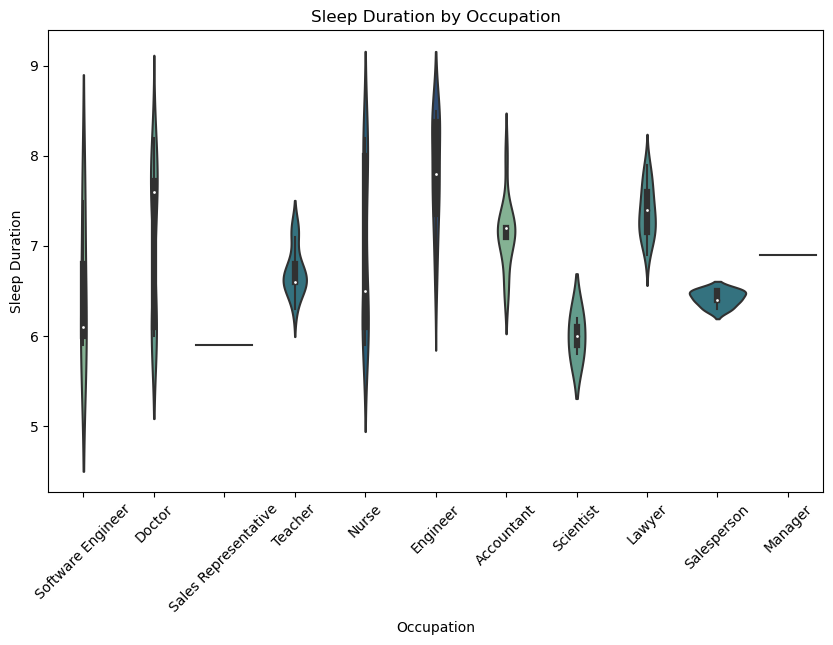

In [28]:
# Choosing a custom colour palette 
custom_palette = sns.color_palette("crest")

# Create a violin plot with the custom palette
plt.figure(figsize=(10, 6))
sns.violinplot(x="Occupation", y="Sleep Duration", data=df3, palette=custom_palette)
plt.title("Sleep Duration by Occupation")
plt.xticks(rotation=45)
plt.show()

From this we can gather:
- We have little data on Sales Representatives and Managers, so we cannot draw any strong conclusions from their data
- Scientists get the least sleep on average (6 hours)
- Engineers get the most sleep on average (7.8 hours)
- There is a large variation in the amount of sleep that Software Engineers, Doctors, Nurses, and Accountants get
- There is a small variation in the amount of sleep that Salespersons and Scientists get

There is definitely a significant difference in sleep duration based on occupation.

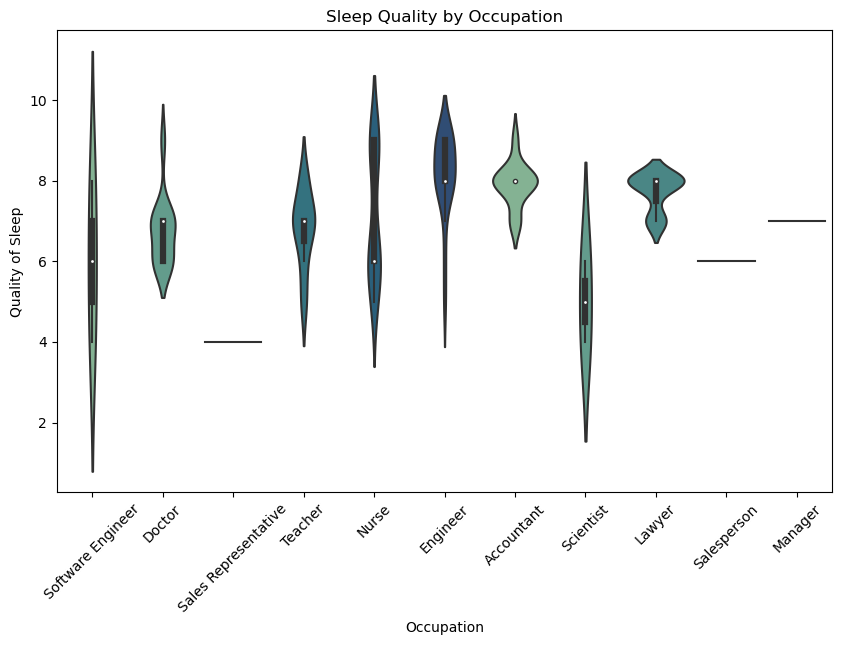

In [29]:
# Create a violin plot with the custom palette
plt.figure(figsize=(10, 6))
sns.violinplot(x="Occupation", y="Quality of Sleep", data=df3, palette=custom_palette)
plt.title("Sleep Quality by Occupation")
plt.xticks(rotation=45)
plt.show()

From this we can gather:
- We have little data on Sales Representatives, Salespersons, and Managers so we cannot draw any strong conclusions from their data
- Scientists had the lowest sleep quality on average (5/10)
- Engineers had the highest sleep quality on average (8.1/10)
- There is a large variation in the sleep quality of Software engineers, Nurses, Engineers, and Scientists
- There is a small variation in the sleep quality of Accountants and Lawyers

There is a marked difference between some of the occupations, especially difference between the occupations with the highest and lowest sleep quality.

### 6.1.4. What are the most common reasons for poor sleep quality among participants? <a name="reasons"></a>

In [30]:
# Let's create a new df with two categories for sleep quality
def replace_value(row):
    if row['Quality of Sleep'] >= 1 and row['Quality of Sleep'] <6:
        return 'Bad'
    elif row['Quality of Sleep'] >= 6 and row['Quality of Sleep'] <11:
        return 'Good'
    else:
        return row['Quality of Sleep']

df5 = df3
df5['Quality Group'] = df3.apply(replace_value, axis=1)

print(df5)

     Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0      Male   27     Software Engineer             6.1                 6   
1      Male   28                Doctor             6.2                 6   
2      Male   28  Sales Representative             5.9                 4   
3      Male   28     Software Engineer             5.9                 4   
4      Male   29               Teacher             6.3                 6   
..      ...  ...                   ...             ...               ...   
127  Female   59                 Nurse             8.0                 9   
128  Female   59                 Nurse             8.1                 9   
129  Female   59                 Nurse             8.2                 9   
130  Female   59                 Nurse             8.0                 9   
131  Female   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level   BMI Category  Heart Rate  \
0             

In [31]:
# Group data by bad quality sleep
quality_data_bad = df5[df5['Quality Group']=='Bad']
quality_data_bad = quality_data_bad[['Sleep Disorder']]
quality_data_bad = quality_data_bad.groupby(['Sleep Disorder']).value_counts()
quality_data_bad

Sleep Disorder
Insomnia       5
Sleep Apnea    5
Name: count, dtype: int64

In [32]:
# Group data by good quality sleep
quality_data_good = df5[df5['Quality Group']=='Good']
quality_data_good = quality_data_good[['Sleep Disorder']]
quality_data_good = quality_data_good.groupby(['Sleep Disorder']).value_counts()
quality_data_good

Sleep Disorder
Insomnia       24
None           73
Sleep Apnea    25
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1519a14fe80>,
 [Text(0.8965311634423614, 0.6373632190334536, 'Insomnia'),
  Text(-1.0996353151351745, 0.028322671264655336, 'None'),
  Text(0.8798231813741623, -0.660235692398289, 'Sleep Apnea')])

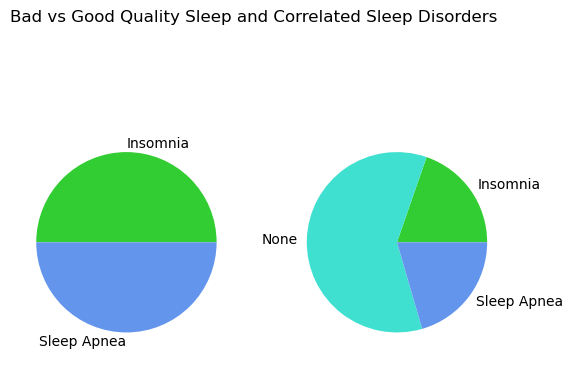

In [33]:
# Plot two pie charts showing the difference

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Bad vs Good Quality Sleep and Correlated Sleep Disorders')
ax1.pie(quality_data_bad, labels=['Insomnia','Sleep Apnea'], colors=["limegreen","cornflowerblue"])
ax2.pie(quality_data_good, labels=['Insomnia', 'None','Sleep Apnea'], colors=['limegreen', 'turquoise','cornflowerblue'])

There is a huge difference between individuals in the dataset with bad sleep quality (<=5) and those with good sleep quality (>5). Individuals with bad sleep quality only have sleep disorders, with half having insomnia and half having sleep apnea. This is compared to individuals with good sleep quality, where more than half have no sleep disorders. Other contributing factors will be explored in sections to come.

## 6.2. Sleep Disorder Identification: <a name="id"></a>

- Can we identify common factors or lifestyle patterns associated with Insomnia or Sleep Apnea?
- Are there age or gender-related trends in the occurrence of sleep disorders?
- What percentage of individuals with Insomnia or Sleep Apnea fall into specific BMI categories?

### 6.2.1. Can we identify common factors or lifestyle patterns associated with Insomnia or Sleep Apnea? <a name="disorders"></a>

In [34]:
disorder_data = df4[['Age','Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP','Sleep Disorder']].groupby(['Sleep Disorder']).mean()
disorder_data

,Age,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
Sleep Disorder,,,,,,,
Insomnia,41.620690,48.103448,6.034483,72.206897,5755.172414,131.724138,86.413793
None,39.452055,58.712329,5.178082,69.547945,6861.643836,124.356164,81.547945
Sleep Apnea,44.733333,67.566667,5.933333,74.266667,6946.666667,134.866667,90.000000


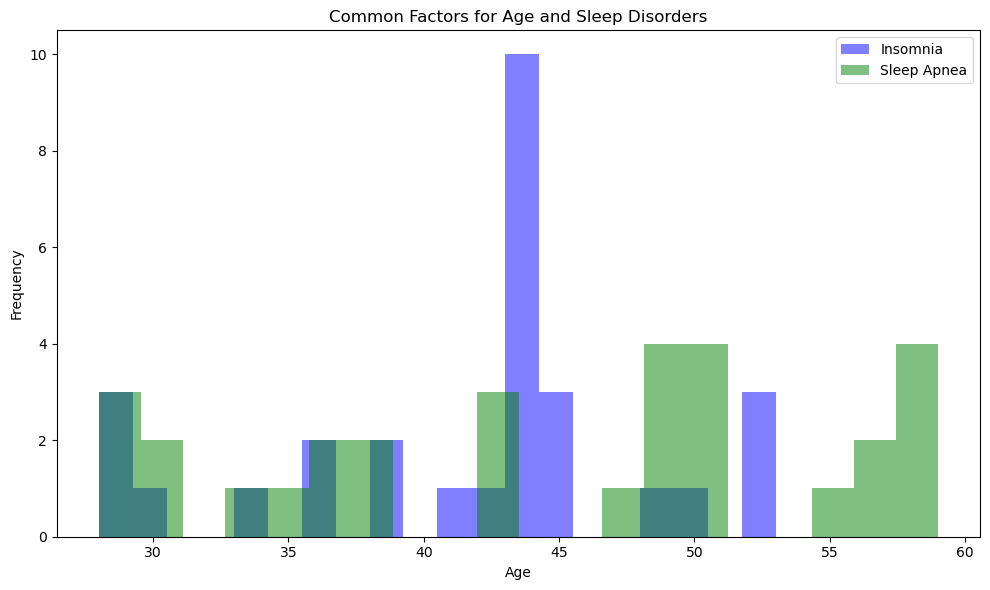

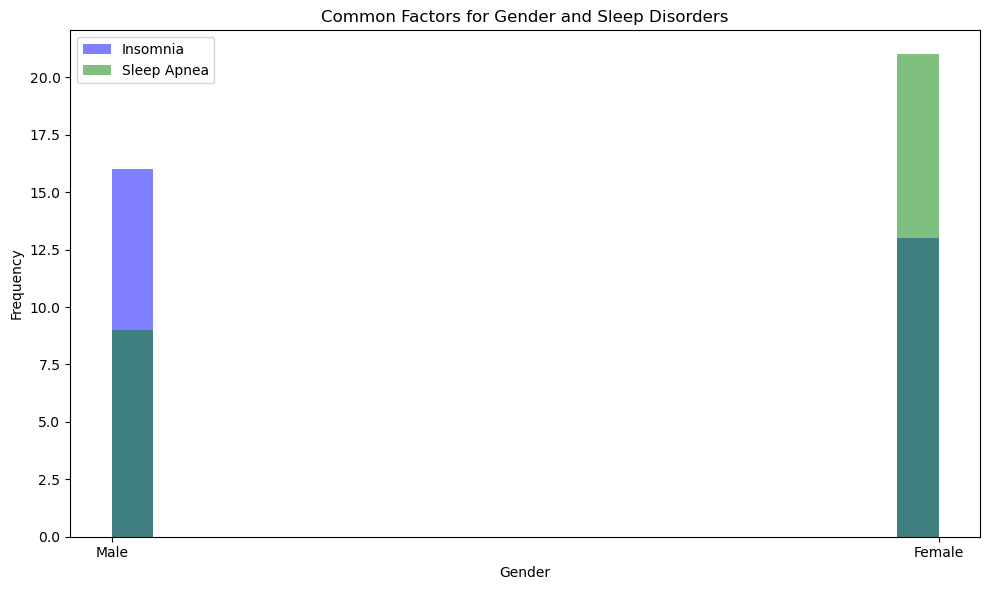

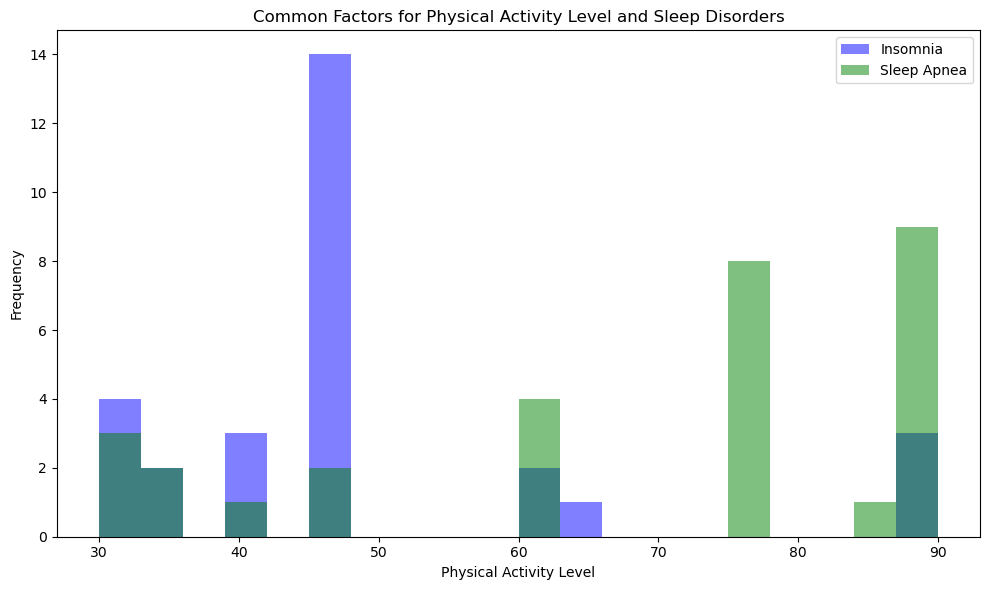

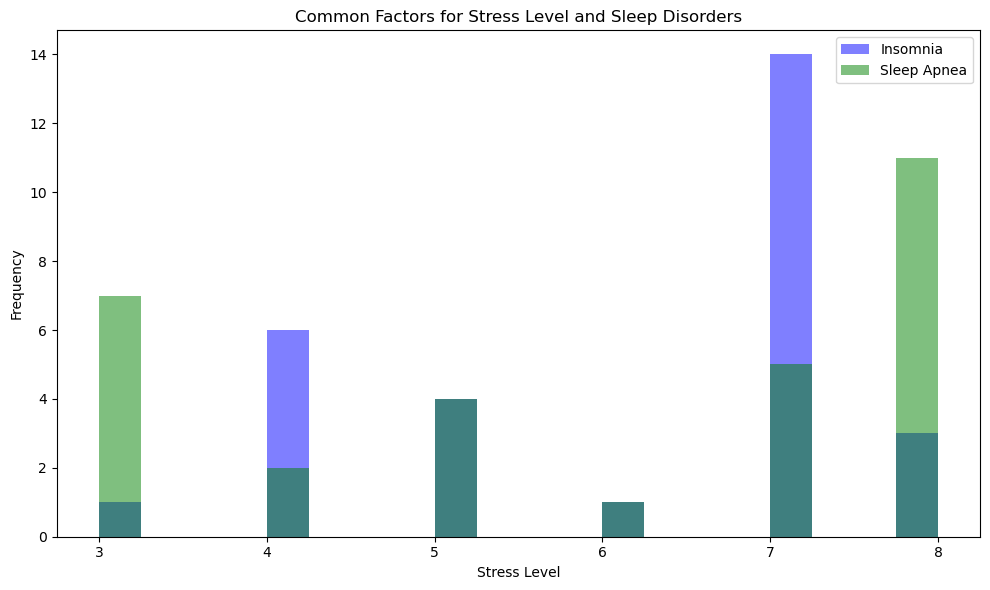

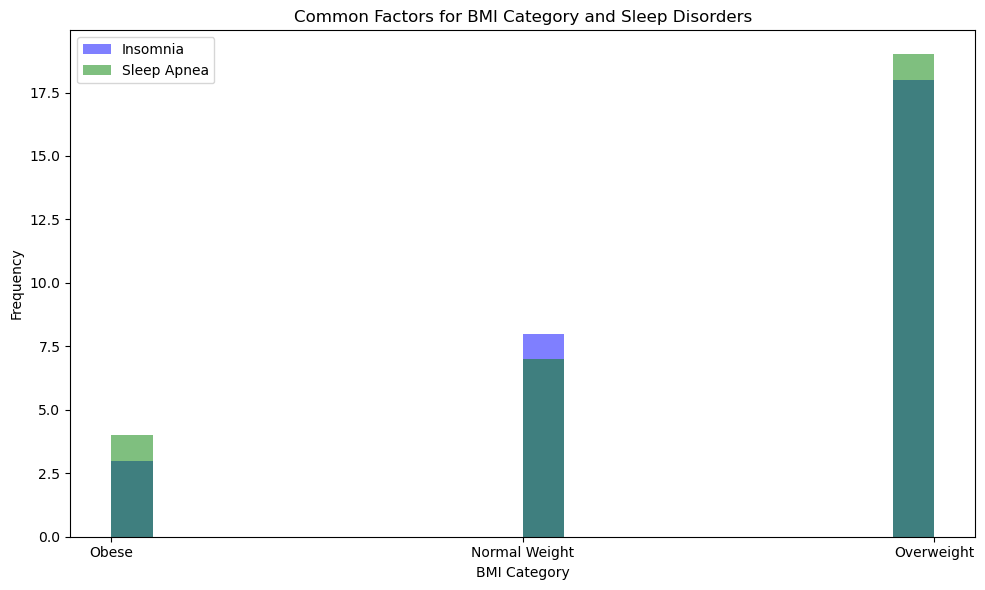

In [35]:
# Filter rows with Insomnia or Sleep Apnea
insomnia_df = df3[df3['Sleep Disorder'].isin(['Insomnia'])]
sleep_apnea_df = df3[df3['Sleep Disorder'].isin(['Sleep Apnea'])]

# Explore factors and lifestyle patterns
factors_to_explore = ['Age', 'Gender', 'Physical Activity Level', 'Stress Level', 'BMI Category']
for factor in factors_to_explore:
    plt.figure(figsize=(10, 6))
    plt.title(f'Common Factors for {factor} and Sleep Disorders')
    
    plt.hist(insomnia_df[factor], bins=20, alpha=0.5, label='Insomnia', color='blue')
    plt.hist(sleep_apnea_df[factor], bins=20, alpha=0.5, label='Sleep Apnea', color='green')
    plt.xlabel(factor)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


Compared to those without sleep disorders, the individuals in this dataset with Insomnia tend to:
- Be older
- Have a lower physical activity level and number of daily steps
- Have a higher heart rate
- Have a higher stress level
- Have a higher blood pressure

Compared to those without sleep disorders, the individuals in this dataset with Sleep Apnea tend to:
- Be older
- Have a higher physical activity level and step count
- Have a higher heart rate
- Have a higher stress level
- Have a higher blood pressure (in range of hypertension)

### 6.2.2. Are there age or gender-related trends in the occurrence of sleep disorders? <a name="demodisorder"></a>

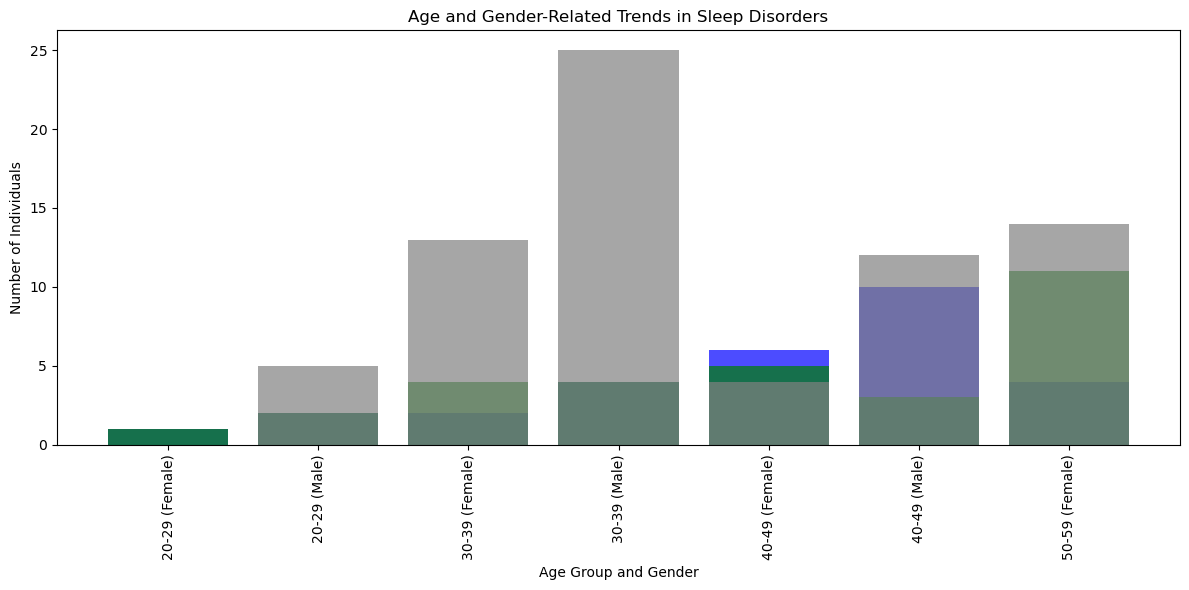

In [36]:
# Filter rows where both Age and Gender are available
filtered_df = df3.dropna(subset=['Age Group', 'Gender'])

# Group data by age and gender to count occurrences of each sleep disorder
age_gender_sleep_counts = filtered_df.groupby(['Age Group', 'Gender', 'Sleep Disorder']).size().reset_index(name='Count')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
plt.title('Age and Gender-Related Trends in Sleep Disorders')
plt.xlabel('Age Group and Gender')
plt.ylabel('Number of Individuals')

colors = {'Insomnia': 'blue', 'Sleep Apnea': 'green', 'None': 'gray'}

# Iterate through age and gender groups
for age_group, gender in age_gender_sleep_counts[['Age Group', 'Gender']].drop_duplicates().values:
    subset = age_gender_sleep_counts[(age_gender_sleep_counts['Age Group'] == age_group) & (age_gender_sleep_counts['Gender'] == gender)]
    age_gender_label = f"{age_group} ({gender})"
    
    # Create a bar for each sleep disorder category
    for sleep_disorder, color in colors.items():
        count = subset[subset['Sleep Disorder'] == sleep_disorder]['Count'].values
        if len(count) > 0:
            plt.bar(
                age_gender_label,
                count,
                color=color,
                label=sleep_disorder,
                alpha=0.7
            )

plt.xticks(rotation=90)
#plt.legend()
plt.tight_layout()
plt.show()


What this shows us is that:
- All the 20-29 year old females in the dataset have insomnia
- Sleep Apnea occurs in 40-49 year olds, favouring males
- Sleep disorders are more common later in life and in the 20-29 year old range
- Insomnia is more common in females than males

### 6.2.3. What percentage of individuals with Insomnia or Sleep Apnea fall into specific BMI categories? <a name="bmidisorder"></a>

In [37]:
# Calculate the percentage of individuals in each BMI category
# total_count = len(df)
insomnia_bmi_percentage = (insomnia_df['BMI Category'].value_counts() / len(insomnia_df)) * 100
sleep_apnea_bmi_percentage = (sleep_apnea_df['BMI Category'].value_counts() / len(sleep_apnea_df)) * 100
total_bmi_percentage = (df3['BMI Category'].value_counts() / len(df3)) * 100

# Print the results
print("Percentage of individuals with Insomnia in each BMI category:")
print(insomnia_bmi_percentage)

print("\nPercentage of individuals with Sleep Apnea in each BMI category:")
print(sleep_apnea_bmi_percentage)

print("\nPercentage of individuals overall in each BMI category:")
print(total_bmi_percentage)

Percentage of individuals with Insomnia in each BMI category:
BMI Category
Overweight       62.068966
Normal Weight    27.586207
Obese            10.344828
Name: count, dtype: float64

Percentage of individuals with Sleep Apnea in each BMI category:
BMI Category
Overweight       63.333333
Normal Weight    23.333333
Obese            13.333333
Name: count, dtype: float64

Percentage of individuals overall in each BMI category:
BMI Category
Normal Weight    55.303030
Overweight       39.393939
Obese             5.303030
Name: count, dtype: float64


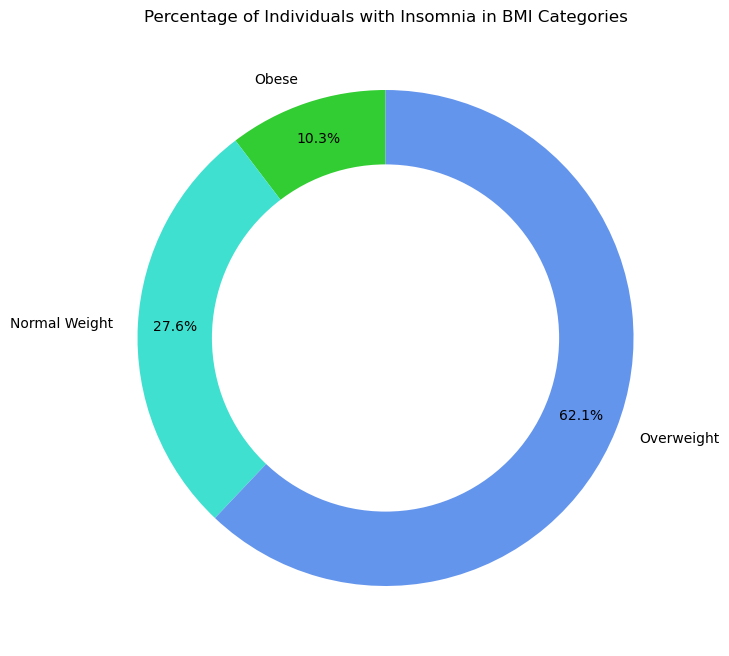

In [38]:
# Calculate the percentage of individuals in each BMI category
total_count = len(df)
insomnia_bmi_percentage = (insomnia_df['BMI Category'].value_counts() / total_count) * 100
sleep_apnea_bmi_percentage = (sleep_apnea_df['BMI Category'].value_counts() / total_count) * 100

# Create a doughnut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Data for the chart
labels = ['Obese', 'Normal Weight', 'Overweight']
insomnia_sizes = insomnia_bmi_percentage[labels].tolist()
# sleep_apnea_sizes = sleep_apnea_bmi_percentage[labels].tolist()

# Colors for the chart
colors = ['limegreen', 'turquoise','cornflowerblue']

# Outer and inner circle for the doughnut chart
ax.pie(insomnia_sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Title
plt.title('Percentage of Individuals with Insomnia in BMI Categories')

plt.show()

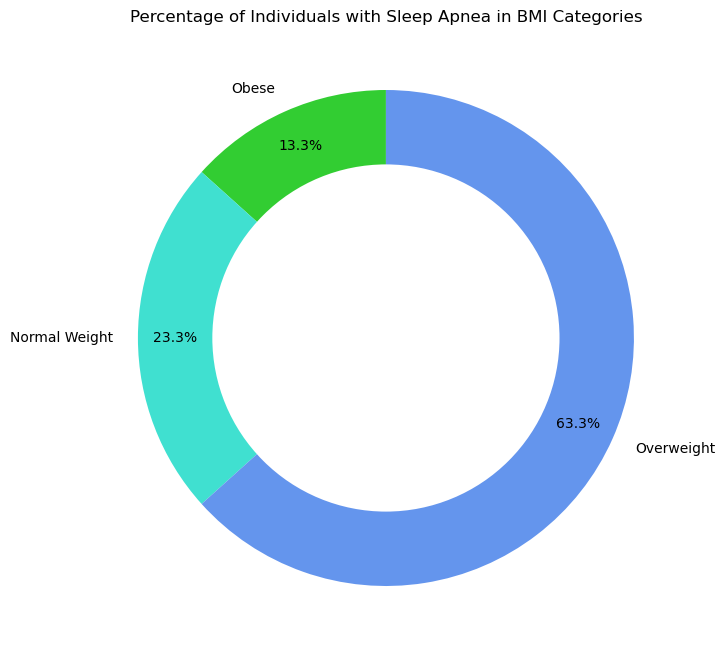

In [39]:
# Create a doughnut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Data for the chart
labels = ['Obese', 'Normal Weight', 'Overweight']
sleep_apnea_sizes = sleep_apnea_bmi_percentage[labels].tolist()

# Colors for the chart
colors = ['limegreen', 'turquoise','cornflowerblue']

# Outer and inner circle for the doughnut chart
ax.pie(sleep_apnea_sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Title
plt.title('Percentage of Individuals with Sleep Apnea in BMI Categories')

plt.show()

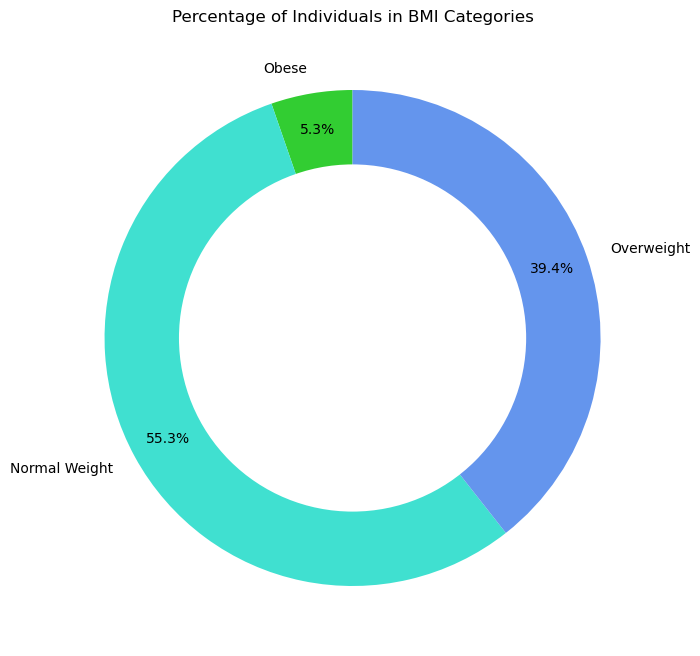

In [40]:
# Create a doughnut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Data for the chart
labels = ['Obese', 'Normal Weight', 'Overweight']
total_sizes = total_bmi_percentage[labels].tolist()

# Colors for the chart
colors = ['limegreen', 'turquoise','cornflowerblue']

# Outer and inner circle for the doughnut chart
ax.pie(total_sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Title
plt.title('Percentage of Individuals in BMI Categories')

plt.show()

We see a marked difference between the general individuals in the dataset and those with sleep disorders. Only 5.3% of the general individuals are obese, whereas 10.3% and 13.3% of people with insomnia are obese, respectively. We see a similar pattern for individuals who are overweight.

## 6.3. Cardiovascular Health Analysis: <a name="cv"></a>

- Is there a relationship between high stress levels and elevated blood pressure readings?
- Do individuals with Sleep Apnea tend to have higher resting heart rates?

### 6.3.1. Is there a relationship between high stress levels and elevated blood pressure readings? <a name="stressbp"></a>

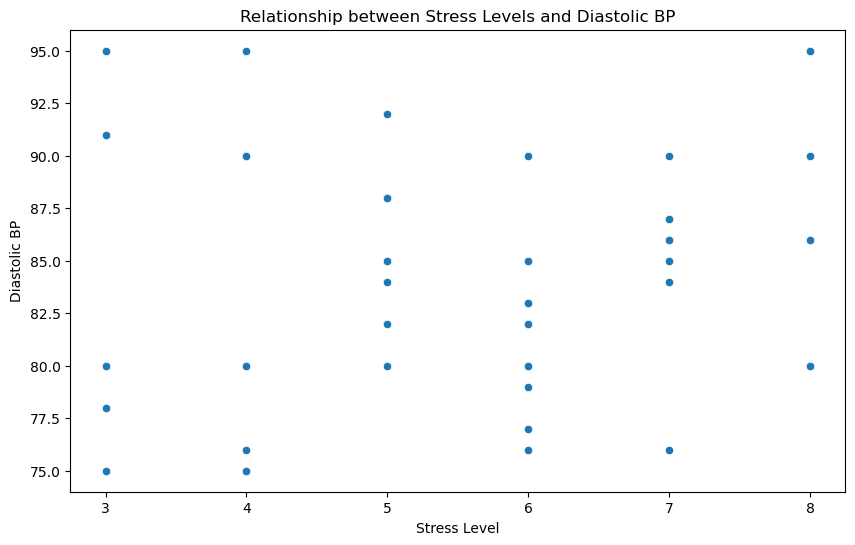

In [41]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Diastolic BP', data=df3)
plt.title('Relationship between Stress Levels and Diastolic BP')
plt.xlabel('Stress Level')
plt.ylabel('Diastolic BP')
plt.show()

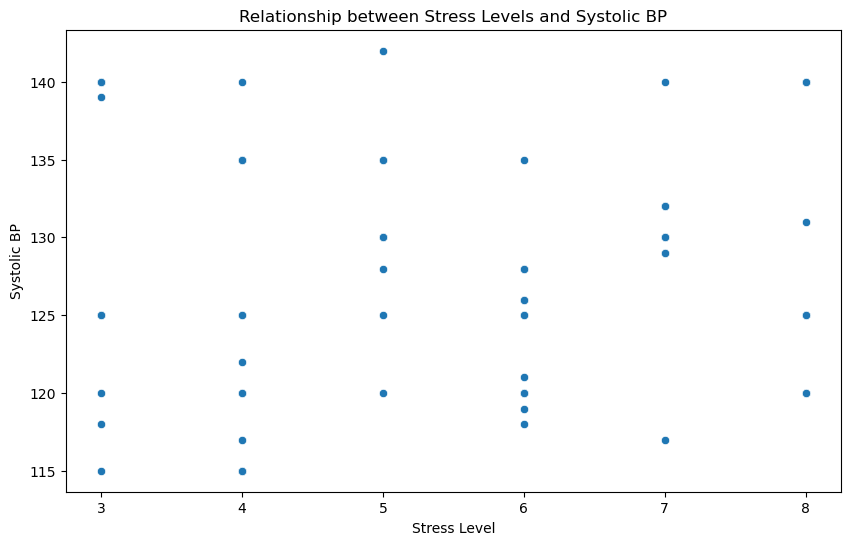

In [42]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level', y='Systolic BP', data=df3)
plt.title('Relationship between Stress Levels and Systolic BP')
plt.xlabel('Stress Level')
plt.ylabel('Systolic BP')
plt.show()


We can see that there is no clear correlation between blood pressure and stress level.

### 6.3.2. Do individuals with Sleep Apnea tend to have higher resting heart rates? <a name="sarate"></a>

{'whiskers': [<matplotlib.lines.Line2D at 0x151994dc970>,
 'caps': [<matplotlib.lines.Line2D at 0x1519929e490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1519908d460>],
 'medians': [<matplotlib.lines.Line2D at 0x1519929e190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1519929ef40>],
 'means': []}

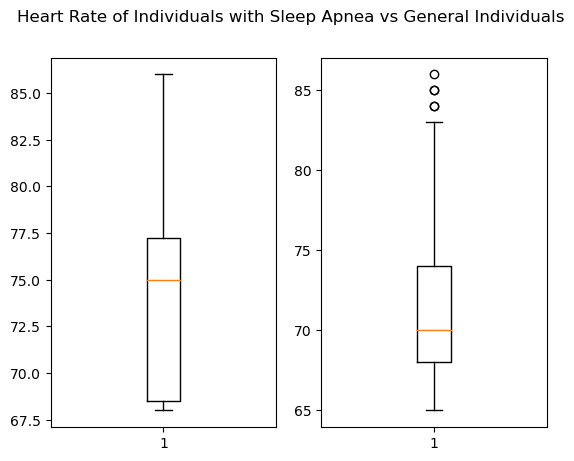

In [43]:
# Filter data for individuals with Sleep Apnea
sleep_apnea_df = df3[df3['Sleep Disorder'] == 'Sleep Apnea']

# Create a side by side box plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Heart Rate of Individuals with Sleep Apnea vs General Individuals')
ax1.boxplot(x='Heart Rate', data=sleep_apnea_df)
ax2.boxplot(x='Heart Rate', data=df3)

We can see that individuals with sleep apnea have a higher resting heart rate than those in the general dataset.

## 6.4. Lifestyle and Physical Activity: <a name="lifestyle"></a>
- Is there a correlation between daily physical activity levels and sleep quality?
- Do individuals with higher physical activity levels tend to sleep longer?
- What is the impact of physical activity on stress reduction?

### 6.4.1. Is there a correlation between daily physical activity levels and sleep quality? <a name="pastress"></a>

In the heatmap done earlier we saw a Pearson correlation coeffient of 0.29 between physical activity levels and sleep quality. This means there is a weak correlation between the two.

### 6.4.2. Do individuals with higher physical activity levels tend to sleep longer? <a name="palength"></a>

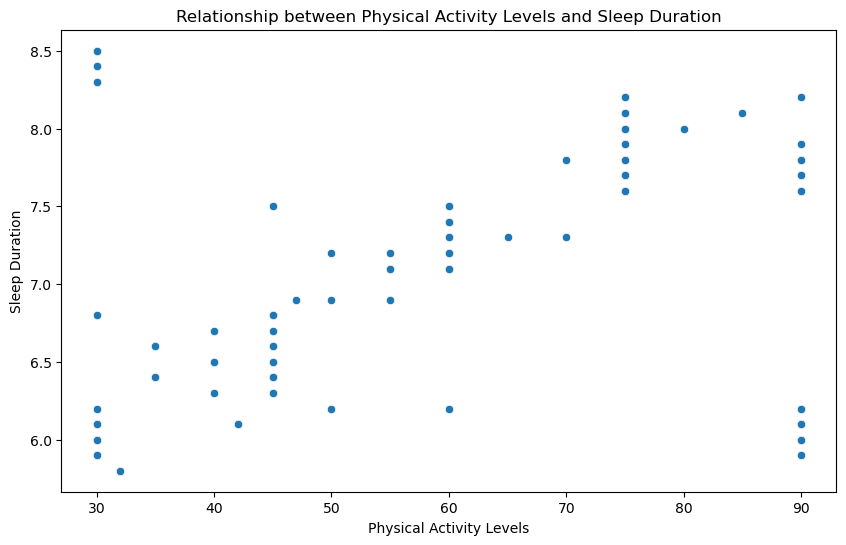

In [44]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical Activity Level', y='Sleep Duration', data=df3)
plt.title('Relationship between Physical Activity Levels and Sleep Duration')
plt.xlabel('Physical Activity Levels')
plt.ylabel('Sleep Duration')
plt.show()

Other than some outliers, we can see a relationship between physical activity levels and sleep duration (as one increases, so does the other). This means increasing activity levels may help with increasing sleep duration and vice versa.

### 6.4.3. What is the impact of physical activity on stress reduction? <a name="pastress"></a>

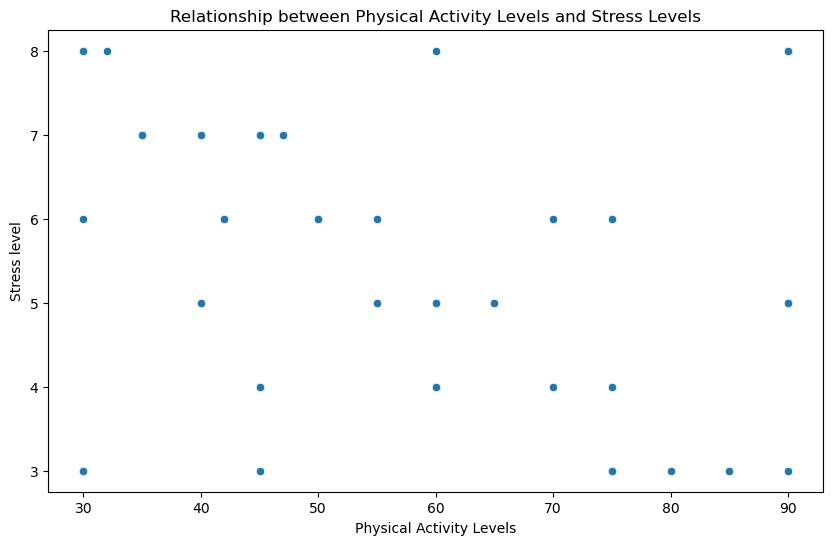

In [45]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical Activity Level', y='Stress Level', data=df3)
plt.title('Relationship between Physical Activity Levels and Stress Levels')
plt.xlabel('Physical Activity Levels')
plt.ylabel('Stress level')
plt.show()

As we can see, there is no clear relationship between stress levels and physical activity levels.

## 6.5. BMI and Health Implications: <a name="bmi"></a>
- Can we identify lifestyle factors contributing to BMI changes?

### 6.5.1. Can we identify lifestyle factors contributing to BMI changes? <a name="lifestylebmi"></a>

In [46]:
bmi_df = df3

In [47]:
# Convert BMI to a numeric variable for correlation analysis
mapping = {'Normal Weight':0,
          'Overweight':1,
          'Obese':2}
bmi_df['bmi_Numeric'] = bmi_df['BMI Category'].map(mapping)

In [48]:
bmi_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Sleep_Disorder_Numeric,Age Group,Quality Group,bmi_Numeric
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,0,20-29,Good,1
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,75,10000,None,125,80,0,20-29,Good,0
2,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,1,20-29,Bad,2
3,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90,2,20-29,Bad,2
4,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90,2,20-29,Good,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,None,140,95,0,50-59,Good,1
128,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,None,140,95,0,50-59,Good,1
129,Female,59,Nurse,8.2,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,1,50-59,Good,1
130,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,1,50-59,Good,1


<Axes: >

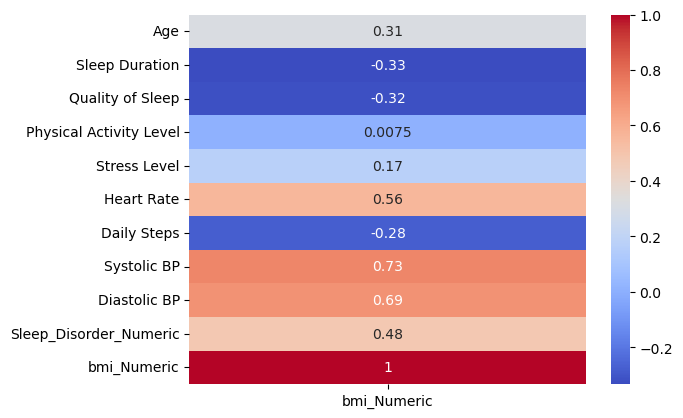

In [70]:
# Calculate correlation matrix
corr_matrix = bmi_df.corr(numeric_only=True)
x = corr_matrix[['bmi_Numeric']]
# Create a heatmap of the correlation matrix
sns.heatmap(x, cmap="coolwarm", annot=True)

We see a strong correlation between BMI and:
- Heart rate
- Systolic Blood Pressure
- Diastolic Blood Pressure

We see a moderate correlation between BMI and:
- Age
- Sleep duration
- Quality of sleep
- Daily steps
- Sleep disorders

From this we can see that:
- There is a relationship between heart rate and BMI, as well as Blood Pressure and BMI. We do not know which affects which or if they are only correlated. 
- BMI increases with age. 
- Daily steps are negatively correlated with BMI, this could mean that more steps reduces weight.